In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import parallel_backend
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import miceforest as mf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import warnings

# Set the warning filter to "ignore" to suppress all warnings
warnings.filterwarnings("ignore")

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
identity_data = pd.read_csv("train_identity.csv")
transaction_data = pd.read_csv("train_transaction.csv")

In [5]:
identity_data.head(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [10]:
identity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [11]:
identity_columns = identity_data.columns
print(identity_columns)

transaction_columns = transaction_data.columns
print(transaction_columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


# Checking null value percentages

In [28]:
identity_null_percentages = pd.DataFrame((identity_data.isnull().sum()/len(identity_data))*100,columns = ['percentage'])
remove_features_identity = identity_null_percentages[identity_null_percentages['percentage']>40].index

#Columns count to be removed
print("Total count of columns to be removed:",len(remove_features_identity))

# Total number of fields
print("Total count of columns in identity data:",len(identity_null_percentages))

Total count of columns to be removed: 19
Total count of columns in identity data: 41


In [29]:
transaction_null_percentages = pd.DataFrame((transaction_data.isnull().sum()/len(transaction_data))*100,columns = ['percentage'])
remove_features_transaction = transaction_null_percentages[transaction_null_percentages['percentage']>40].index

#Columns count to be removed
print("Total count of columns to be removed:",len(remove_features_transaction))

# Total number of fields
print("Total count of columns in transaction data:",len(transaction_null_percentages))

Total count of columns to be removed: 192
Total count of columns in transaction data: 394


In [30]:
# Removing the columns which have more than 40% null values in it
identity_data.drop(remove_features_identity,axis=1,inplace=True)
transaction_data.drop(remove_features_transaction,axis=1,inplace=True)

In [31]:
# Checking null percentages to treat data now for indentity data
identity_null_percentages = pd.DataFrame((identity_data.isnull().sum()/len(identity_data))*100,columns = ['percentage'])
print(identity_null_percentages[identity_null_percentages['percentage']>= 30])


# Checking null percentages to treat data now for transaction data
transaction_null_percentages = pd.DataFrame((transaction_data.isnull().sum()/len(transaction_data))*100,columns = ['percentage'])
print(transaction_null_percentages[transaction_null_percentages['percentage']>= 30])

Empty DataFrame
Columns: [percentage]
Index: []
Empty DataFrame
Columns: [percentage]
Index: []


##### As the dataset is empty it means that we don't have any data which has more than 30% null values. Now we will check the data distribution and work on treating the null values through imputations.

In [33]:
identity_columns = identity_data.columns
print(identity_columns)

transaction_columns = transaction_data.columns
print(transaction_columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12',
       'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29',
       'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')
Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=202)


In [34]:
# Separating continuos and random column names
categorical_features_identity = []

for i in identity_columns:
    if identity_data[i].dtype == "object":
        categorical_features_identity.append(i)
        
continuous_features_identity = [elem for elem in identity_columns if elem not in categorical_features_identity]

In [35]:
# Separating continuos and random column names
categorical_features_transaction = []

for i in transaction_columns:
    if transaction_data[i].dtype == "object":
        categorical_features_transaction.append(i)
        
continuous_features_transaction = [elem for elem in transaction_columns if elem not in categorical_features_transaction]

In [36]:
# Checking null percentages to treat data now for indentity data
identity_null_percentages = pd.DataFrame((identity_data.isnull().sum()/len(identity_data))*100,columns = ['percentage'])
print(identity_null_percentages[identity_null_percentages['percentage']<= 30],'\n\n\n')


# Checking null percentages to treat data now for transaction data
transaction_null_percentages = pd.DataFrame((transaction_data.isnull().sum()/len(transaction_data))*100,columns = ['percentage'])
print(transaction_null_percentages[transaction_null_percentages['percentage']<= 30])

               percentage
TransactionID    0.000000
id_01            0.000000
id_02            2.330257
id_05            5.108401
id_06            5.108401
id_11            2.256765
id_12            0.000000
id_13           11.726165
id_15            2.251912
id_16           10.325654
id_17            3.372321
id_19            3.407681
id_20            3.447200
id_28            2.256765
id_29            2.256765
id_31            2.739318
id_35            2.251912
id_36            2.251912
id_37            2.251912
id_38            2.251912
DeviceType       2.373243
DeviceInfo      17.726179 



                percentage
TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
card1             0.000000
card2             1.512683
card3             0.265012
card4             0.267044
card5             0.721204
card6             0.266028
addr1            11.126427
addr2            11.126427
P_emaildomain    15.

# Converting categorical data into numbers using LabelEncoders

In [39]:
# Converting all categorical information to numbers by encoding them
for column in identity_data.iloc[:,1:].columns:
    if identity_data[column].dtype == 'O':
        le = preprocessing.LabelEncoder()
        identity_data[column] = le.fit_transform(identity_data[column])

In [40]:
# Converting all categorical information to numbers by encoding them
for column in transaction_data.iloc[:,1:].columns:
    if transaction_data[column].dtype == 'O':
        le = preprocessing.LabelEncoder()
        transaction_data[column] = le.fit_transform(transaction_data[column])

# Correlation Matrix

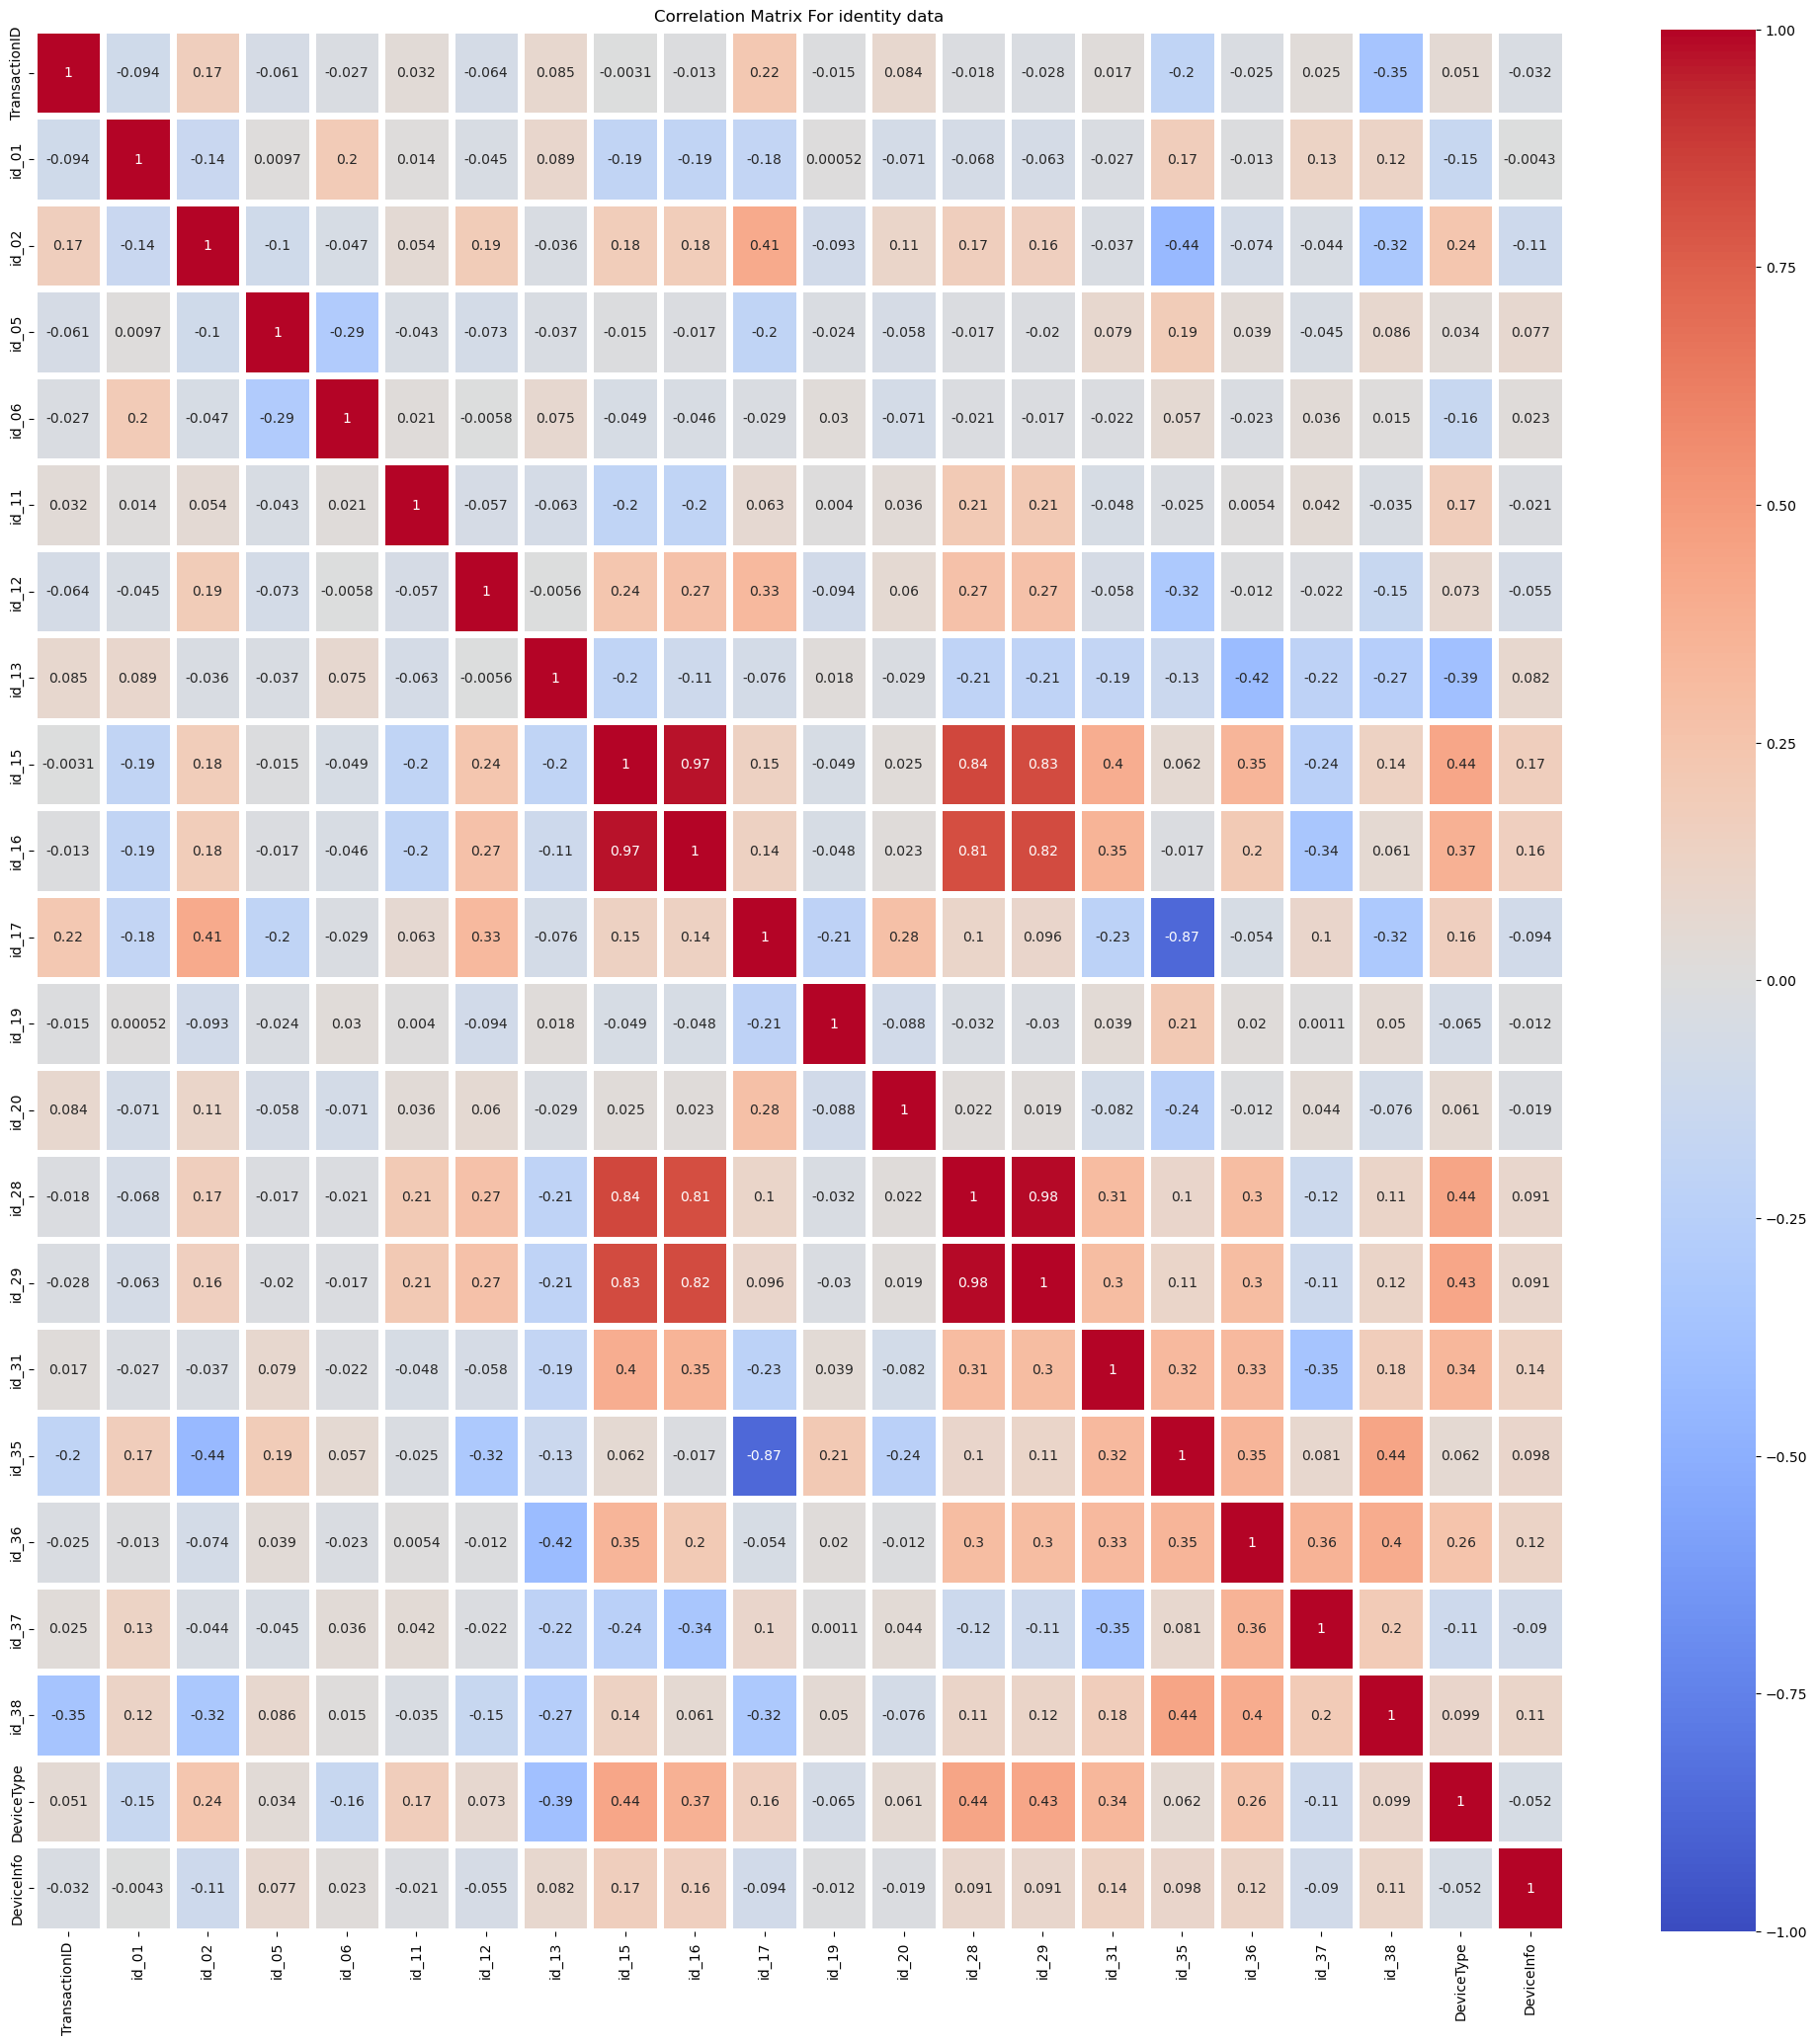

In [42]:
# Obtaining the correlation data of identity dataset
identity_corr_matrix = identity_data.corr(method='pearson')

# Create a heatmap using Seaborn
plt.figure(figsize=(25, 25))  # Optional: Adjust the figure size
sns.heatmap(identity_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=5)

# Add labels and title
plt.title("Correlation Matrix For identity data")
plt.show()

#### Need to check for 'id_28' and 'id_29'.

In [43]:
# Removing the highly correlated columns
#identity_data.drop(['id_15','id_29','id_28','id_35'],axis=1,inplace=True)

In [44]:
# Obtaining the correlation data of identity dataset
transaction_corr_matrix = transaction_data.corr(method='pearson')

# Create a heatmap using Seaborn
# plt.figure(figsize=(220, 220))  # Optional: Adjust the figure size
# sns.heatmap(transaction_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=5)

# Add labels and title
# plt.title("Correlation Matrix For transaction data")
# plt.savefig('correlation_heatmap.png', dpi = 150, bbox_inches='tight')
# plt.show()

In [46]:
# Get pairs of highly correlated features
highly_correlated_pairs = (
    (i, j, transaction_corr_matrix.loc[i, j])
    for i in transaction_corr_matrix.columns
    for j in transaction_corr_matrix.columns
    if i < j and  abs(transaction_corr_matrix.loc[i, j]) >= 0.95
)

# Create a DataFrame to store the results
highly_correlated_df = pd.DataFrame(
    highly_correlated_pairs, columns=["Feature_1", "Feature_2", "Correlation"]
)

# Display the features with correlation greater than 0.95
highly_correlated_df

,Feature_1,Feature_2,Correlation
0,TransactionDT,TransactionID,0.998280
1,ProductCD,V50,-0.973914
2,C1,C2,0.995089
3,C1,C4,0.967800
4,C1,C6,0.982238
5,C1,C8,0.967746
6,C1,C10,0.958202
7,C1,C11,0.996515
8,C1,C14,0.951761
9,C2,C4,0.972134


In [47]:
highly_correlated_df['Feature_1'].nunique()

59

In [49]:
# Removing the highly correlated columns [TransactionDT]
transaction_data.drop(['TransactionDT'],axis=1,inplace=True)

Clearly, Transaction ID is very similar to TransactionDT as it is just its details. Hence, we are removing them. Other fields require more understanding.

# Obtaining the correlation data of identity dataset
transaction_corr_matrix = transaction_data.corr(method='pearson')

# Create a heatmap using Seaborn
plt.figure(figsize=(220, 220))  # Optional: Adjust the figure size
sns.heatmap(transaction_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=5)

# Add labels and title
plt.title("Correlation Matrix For transaction data")
plt.savefig('correlation_heatmap.png', dpi = 150, bbox_inches='tight')
plt.show()

# Get pairs of highly correlated features
highly_correlated_pairs = (
    (i, j, transaction_corr_matrix.loc[i, j])
    for i in transaction_corr_matrix.columns
    for j in transaction_corr_matrix.columns
    if i < j and  abs(transaction_corr_matrix.loc[i, j]) > 0.8
)

# Create a DataFrame to store the results
highly_correlated_df = pd.DataFrame(
    highly_correlated_pairs, columns=["Feature_1", "Feature_2", "Correlation"]
)

# Display the features with correlation greater than 0.8
highly_correlated_df

#### Now the data looks good. Proceeding to merge the data and treating null values.

# Create a distribution matrix using Seaborn's pairplot
sns.set(style="ticks")
sns.pairplot(identity_data, kind="hist", diag_kind="kde")

plt.show()

# Merging the data now

In [50]:
identity_data.shape

(144233, 22)

In [51]:
transaction_data.shape

(590540, 201)

In [55]:
merged = pd.merge(transaction_data,identity_data, on = "TransactionID", how="inner")
merged.shape

(144233, 222)

In [57]:
merged.head()

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,M6,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,50.000,1,4497,514.0,150.0,2,102.0,1,420.0,87.0,16,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,70787.0,NaN,NaN,100.0,1,NaN,1,1,166.0,542.0,144.0,1,1,123,1,0,1,1,1,954
1,2987008,0,15.000,1,2803,100.0,150.0,3,226.0,2,337.0,87.0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-5.0,98945.0,0.0,-5.0,100.0,1,49.0,1,1,166.0,621.0,500.0,1,1,98,1,0,0,1,1,1727
2,2987010,0,75.887,0,16496,352.0,117.0,2,134.0,1,NaN,NaN,16,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,166.215393,166.215393,166.215393,90.327904,90.327904,31.841299,90.327904,90.327904,90.327904,90.327904,0.0,0.0,0.0,75.887497,75.887497,75.887497,-5.0,191631.0,0.0,0.0,100.0,1,52.0,0,0,121.0,410.0,142.0,0,0,44,0,0,1,1,0,1598
3,2987011,0,16.495,0,4461,375.0,185.0,2,224.0,2,NaN,NaN

In [58]:
merged.drop_duplicates(inplace=True)

In [59]:
merged.shape

(144233, 222)

# Null value treatment

In [74]:
(merged.isnull().sum()/len(merged)).sort_values(ascending=False)

V39               0.551108
V44               0.551108
V52               0.551108
V51               0.551108
V49               0.551108
V48               0.551108
V47               0.551108
V46               0.551108
V45               0.551108
V50               0.551108
V43               0.551108
V37               0.551108
V42               0.551108
V38               0.551108
V40               0.551108
V36               0.551108
V35               0.551108
V41               0.551108
D4                0.550949
V64               0.530579
V53               0.530579
V54               0.530579
V56               0.530579
V57               0.530579
V58               0.530579
V59               0.530579
V60               0.530579
V61               0.530579
V62               0.530579
V63               0.530579
V55               0.530579
V65               0.530579
V66               0.530579
V68               0.530579
V69               0.530579
V70               0.530579
V71               0.530579
V

In [77]:
merged_null_percentages = pd.DataFrame(((merged.isnull().sum()/len(merged)))*100,columns = ['percentage'])
remove_features_merged = merged_null_percentages[merged_null_percentages['percentage']>40].index

#Columns count to be removed
print("Total count of columns to be removed:",len(remove_features_merged))

# Total number of fields
print("Total count of columns in merged data:",len(merged.columns))

Total count of columns to be removed: 88
Total count of columns in merged data: 222


In [88]:
## Removing all the features with null values > 40% after merging the data
merged.drop(remove_features_merged,axis=1,inplace=True)

In [90]:
merged.shape

(144233, 134)

imputer = IterativeImputer(random_state=100, max_iter=10)

# fit on the dataset
imputed = imputer.fit_transform(merged)

merged_imputed = pd.DataFrame(imputed, columns=merged.columns)

In [91]:
from joblib import parallel_backend
from impyute.imputation.cs import mice

# Specify the number of iterations for MICE
max_iter = 10

# Specify the number of parallel jobs
n_jobs = -1  # Set to -1 for using all available cores, adjust as needed

with parallel_backend("threading", n_jobs=n_jobs):
    # Fit and transform the data using MICE imputer
    imputed_data = mice(merged.values)

merged_imputed = pd.DataFrame(imputed_data, columns=merged.columns)
merged_imputed.head(20)


KeyboardInterrupt: 

In [92]:
merged_imputed.isnull().sum()

NameError: name 'merged_imputed' is not defined

In [216]:
merged_imputed.shape

(144233, 93)

In [219]:
merged.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12',
       'id_13', 'id_16', 'id_17', 'id_19', 'id_20', 'id_31', 'id_36', 'id_37',
       'id_38', 'DeviceType', 'DeviceInfo', 'isFraud', 'TransactionAmt',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'P_emaildomain', 'C3', 'C8', 'C9', 'D1', 'D4', 'D10', 'D15', 'M6',
       'V13', 'V20', 'V24', 'V26', 'V36', 'V38', 'V45', 'V46', 'V47', 'V54',
       'V55', 'V56', 'V62', 'V65', 'V67', 'V76', 'V77', 'V78', 'V83', 'V87',
       'V88', 'V89', 'V91', 'V94', 'V97', 'V98', 'V99', 'V107', 'V109', 'V110',
       'V113', 'V115', 'V116', 'V118', 'V119', 'V120', 'V121', 'V122', 'V124',
       'V125', 'V137', 'V281', 'V282', 'V283', 'V284', 'V286', 'V287', 'V289',
       'V292', 'V301', 'V305', 'V310', 'V311', 'V312', 'V315', 'V321'],
      dtype='object')

In [224]:
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [244]:
# Initialize and fit the logistic regression model on the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Now you can evaluate the model's performance using metrics like accuracy, precision, recall, etc.
# For example, using accuracy:
accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9256421811626859


# Performance of the model

In [245]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[26546    41]
 [ 2104   156]]
Precision: 0.7918781725888325
Recall: 0.06902654867256637
F1 Score: 0.12698412698412698


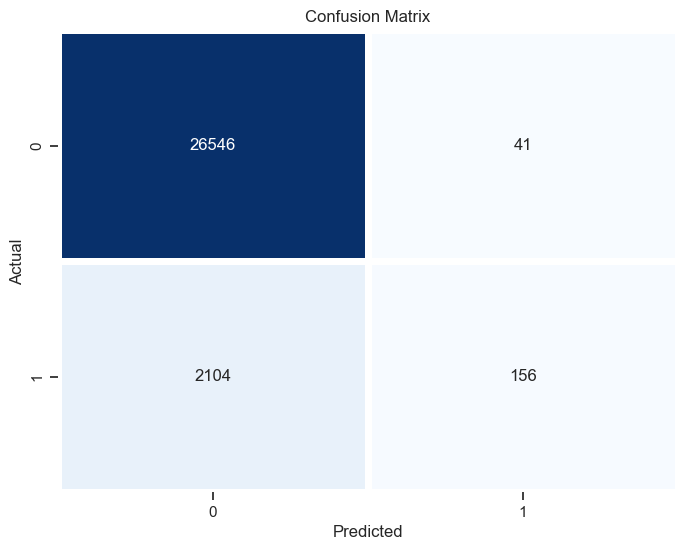

In [246]:
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, linewidths=5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve

AUC Score: 0.6214196438408417


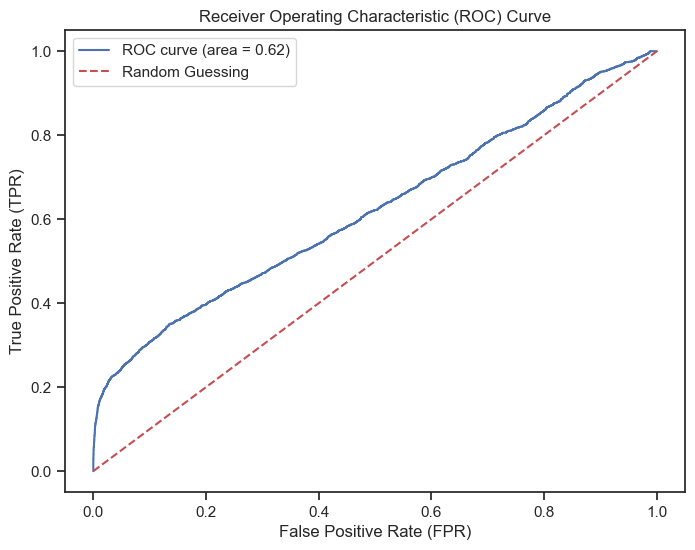

In [247]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

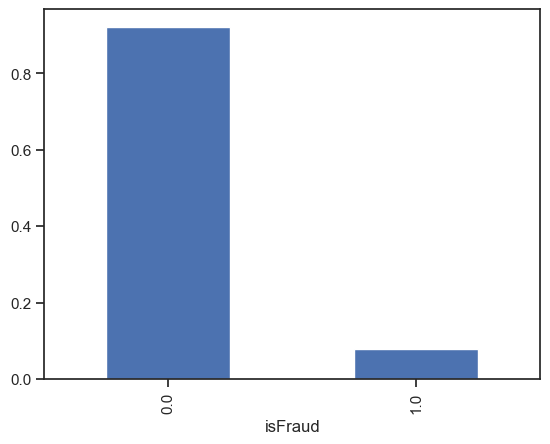

In [249]:
# Visualizing the imbalance in the dataset
temp_ser = y.value_counts(normalize=True)
temp_ser.plot(kind='bar')
plt.xlabel('isFraud')
plt.show()   

#### Clearly, the data is very imbalanced and we need to improve the F-1 score to improve the model. Also, AUC curves shows that the model is not classifying the fraud cases properly as it is very close to 0.5. We need AUC scores more than 0.85 to create a better model to detect fraud cases.

# Understanding data through more EDA to get better results

## Treating outliers now

In [252]:
merged_imputed_copy = merged_imputed.copy()

In [276]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(merged_imputed_copy) 

C:\Users\sid23\anaconda3\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\sid23\anaconda3\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


PowerTransformer()

In [269]:
pt.lambdas_

array([-2.13776740e+00,  1.95763540e+00,  8.75304226e-01,  8.17653466e-01,
        1.59926521e+00,  7.68846870e+01,  9.73375113e+00,  2.34480775e+00,
       -2.92339816e-01,  3.07917324e-01,  8.20129640e-01,  1.18381194e+00,
        3.69197833e-01, -1.72432287e+01,  1.91845036e+00, -4.93301377e-01,
       -1.62460614e+00,  2.97243740e+00, -1.83845637e+01,  7.03761765e-03,
        7.42772456e-01,  1.29440828e+00,  7.80904221e-01,  3.41128776e+00,
        3.22733380e+00, -6.66065988e-01,  1.23229652e+00,  8.52116833e-01,
        3.87162123e-01, -7.65032536e+01, -1.08214509e+00,  8.47213581e+00,
        1.81438369e-01,  8.54892762e-01,  6.79020232e-01,  5.12813296e-01,
        8.54965599e-01,  8.47213581e+00,  6.09692473e-01,  5.41523106e-01,
        3.62836607e-01,  8.47213581e+00,  1.49207380e-01,  2.08411946e-01,
        1.72182919e+00,  1.53027345e+00,  8.47213581e+00, -5.94340867e-01,
        5.04559530e-01,  4.67836589e-01,  1.31446548e+01,  2.33257555e-01,
        8.47213581e+00,  

In [258]:
len(pt.transform(merged_imputed_copy))

144233

In [260]:
merged_imputed_copy.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_16,id_17,...,V287,V289,V292,V301,V305,V310,V311,V312,V315,V321
0,2987004.0,0.0,70787.0,2.100815,-5.88588,100.0,1.0,38.429665,1.0,166.0,...,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,2987008.0,-5.0,98945.0,0.000000,-5.00000,100.0,1.0,49.000000,1.0,166.0,...,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2987010.0,-5.0,191631.0,0.000000,0.00000,100.0,1.0,52.000000,0.0,121.0,...,2.0,2.0,4.0,1.0,1.0,90.327904,31.841299,90.327904,90.327904,75.887497
3,2987011.0,-5.0,221832.0,0.000000,-6.00000,100.0,1.0,52.000000,1.0,225.0,...,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,2987016.0,0.0,7460.0,1.000000,0.00000,100.0,1.0,47.005268,0.0,166.0,...,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [267]:
merged_imputed.describe()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_16,id_17,...,V287,V289,V292,V301,V305,V310,V311,V312,V315,V321
count,1.442330e+05,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,...,144233.000000,144233.000000,144233.000000,144233.000000,144233.0,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000
mean,3.236329e+06,-10.170502,175448.008016,1.718066,-7.182451,99.747908,0.852960,47.567562,0.643417,189.151935,...,0.244077,0.140377,1.300089,0.087076,1.0,37.299709,4.543510,18.359374,8.815608,54.809373
std,1.788496e+05,14.347949,158164.671220,5.162840,16.420774,1.115148,0.354147,11.240072,0.660263,30.159994,...,1.034243,0.451097,2.608494,0.439758,0.0,340.573402,183.835526,213.234136,47.901447,704.073366
min,2.987004e+06,-100.000000,-232008.214441,-72.000000,-100.000000,90.000000,0.000000,-98.880135,0.000000,44.768451,...,0.000000,-0.092115,1.000000,-0.654796,1.0,-31.186500,0.000000,0.000000,-15.115658,-784.106348
25%,3.077142e+06,-10.000000,69168.000000,0.000000,-7.000000,100.000000,1.000000,44.623132,0.000000,166.000000,...,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.198818e+06,-5.000000,128774.000000,0.000000,0.000000,100.000000,1.000000,52.000000,1.000000,166.000000,...,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.392923e+06,-5.000000,229698.000000,1.000000,0.000000,100.000000,1.000000,52.000000,1.000000,225.000000,...,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577534e+06,0.000000,999595.000000,52.000000,47.285519,100.785610,1.000000,92.484720,2.000000,367.733421,...,14.000000,9.000000,199.000000,11.000000,1.0,55125.000000,55125.000000,55125.000000,3300.000000,104060.000000


C:\Users\sid23\AppData\Local\Temp\ipykernel_25416\1920535782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_imputed['id_17'],hist=False,kde_kws={'shade':3,'linewidth':2})
C:\Users\sid23\anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=3`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='id_17', ylabel='Density'>

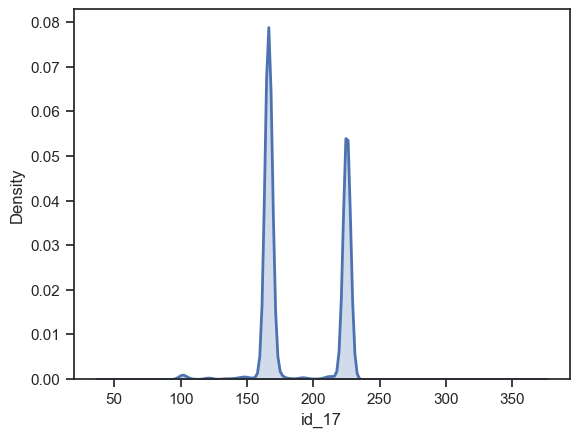

In [268]:
sns.distplot(merged_imputed['id_17'],hist=False,kde_kws={'shade':3,'linewidth':2})

In [262]:
merged_imputed.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_16,id_17,...,V287,V289,V292,V301,V305,V310,V311,V312,V315,V321
0,2987004.0,0.0,70787.0,2.100815,-5.88588,100.0,1.0,38.429665,1.0,166.0,...,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,2987008.0,-5.0,98945.0,0.000000,-5.00000,100.0,1.0,49.000000,1.0,166.0,...,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2987010.0,-5.0,191631.0,0.000000,0.00000,100.0,1.0,52.000000,0.0,121.0,...,2.0,2.0,4.0,1.0,1.0,90.327904,31.841299,90.327904,90.327904,75.887497
3,2987011.0,-5.0,221832.0,0.000000,-6.00000,100.0,1.0,52.000000,1.0,225.0,...,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,2987016.0,0.0,7460.0,1.000000,0.00000,100.0,1.0,47.005268,0.0,166.0,...,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [278]:
from scipy import stats

merged_imputed.loc[merged_imputed.id_17 > merged_imputed.id_17.quantile(0.99), 'id_17'] = merged_imputed.id_17.quantile(0.99)
merged_imputed.loc[merged_imputed.id_17 < merged_imputed.id_17.quantile(0.01), 'id_17'] = merged_imputed.id_17.quantile(0.01)

# Apply Yeo-Johnson transformation
transformed_data, lambda_ = stats.yeojohnson(merged_imputed['id_17'])

C:\Users\sid23\AppData\Local\Temp\ipykernel_25416\4586348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data,hist=False,kde_kws={'shade':3,'linewidth':2})
C:\Users\sid23\anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=3`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: ylabel='Density'>

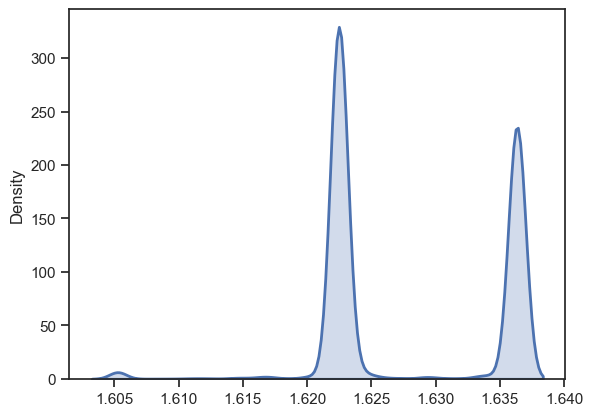

In [279]:
sns.distplot(transformed_data,hist=False,kde_kws={'shade':3,'linewidth':2})

In [273]:
transformed_data

array([12.45523591, 12.45523591, 11.00819529, ..., 13.98838142,
       12.45523591, 13.98838142])

In [274]:
from scipy.special import boxcox1p, boxcox
import scipy.stats as stats


0         166.0
1         166.0
2         121.0
3         225.0
4         166.0
          ...  
144228    225.0
144229    166.0
144230    225.0
144231    166.0
144232    225.0
Name: id_17, Length: 144233, dtype: float64